# Introduction
In today's competitive video game industry, understanding market trends and consumer preferences is crucial for the success of international video game retailers like Ice.  To help Ice plan its 2017 marketing strategy, I analyzed a data set with information on 16,000 video games released 1980-2016.  This data will help our marketing team to identify trends in which games succeed and which do not to better allocate the advertising budget.  After loading and cleaning the data, I identified a relevant subset of the data upon which to focus further inquiry into which platforms, genres, and ratings sell in the North American, European, and Japanese markets.  I also examined whether user and critic reviews have an impact of sales so that the marketing team knows how much attention to pay to reviews of upcoming games.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Upon loading the dataset, we can see that our dataset contains data for over 16k video games.  Platform and sales data is all intact.  There are some bizarre gaps in the data, however.  There are 2 entries that are missing name and genre; I will fill these with "Unknown."  Year_of_Release is missing for 269 games.  This is a small portion of the data set (< 2%), so this missing data can be overlooked.  Critic and User Scores and Rating are missing for a large portion of the games, possibly due to being older games.  While this is unfortunate, it is a limitation on our data set, meaning we essentially only have complete data for 8000 games.  Finally, I will ensure the dataframe does not contain any explicit or implicit duplicates before proceeding.

In [4]:
games['Name'] = games['Name'].fillna('Unknown')

In [5]:
games['Genre'] = games['Genre'].fillna('Unknown')

In [6]:
name_genre_missing = games[games['Name'].isnull()]
name_genre_missing

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


Missing names and genres have been replaced with filler value.

In working toward converting the User_Score to a float data type and filling missing data with the median score, I encountered an error with rows that contained "tbd."  Given these games were released in the 2000s and early 2010s, it seems reasonable to assume the User_Score will not be determined and is, essentially, a null value.  I will therefore convert it to such before filling all tbd and existing NaN values with 'Unknown.'

In [7]:
games.loc[games['User_Score'].str.contains('tbd', na=False), 'User_Score'] = np.nan
score_tbd = games[games['User_Score'].str.contains('tbd', na=False)]
score_tbd

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [8]:
games['User_Score'] = games['User_Score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16715 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16715 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       7590 non-null   float64
 10  Rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [9]:
games['Rating'] = games['Rating'].fillna('Unknown')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown


User_Score is now float data type.  Additionally, missing ratings were replaced with "Unknown."

I will now transform column names to lower case to simplify code going forward and add an additional column with information on global sales.

In [10]:
games.columns = map(str.lower, games.columns)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown


In [11]:
games['global_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


Having cleaned and augmented the data, I will now verify before moving forward that there are no duplicates.

In [12]:
games.drop_duplicates(inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  global_sales     16715 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


There are no fully duplicate rows.  I will now check for implicit duplicates.

In [13]:
dups = games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
dup_rows = games[dups]
dup_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,Unknown,GEN,1993.0,Unknown,1.78,0.53,0.00,0.08,NaN,NaN,Unknown,2.39
14244,Unknown,GEN,1993.0,Unknown,0.00,0.00,0.03,0.00,NaN,NaN,Unknown,0.03
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


To find implicit duplicates, I searched the data frame for rows with duplicate information in the name, year_of_release, and platform columns.  This returned 2 duplicates: Madden NFL 13 for PS3 and a Genesis game for which there is very little information.  Since these duplicate rows have limited information,  I will combine the sales information and drop the duplicates hereafter.

In [14]:
games_no_dups = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep=False)
games_no_dups

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


In [15]:
dups_agg = dup_rows.groupby(['name', 'year_of_release', 'platform']).agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum',
    'other_sales': 'sum',
    'global_sales': 'sum',
    'critic_score': 'first',
    'user_score': 'first',
    'rating': 'first'
}).reset_index()
dups_agg

,name,year_of_release,platform,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,user_score,rating
0,Madden NFL 13,2012.0,PS3,2.11,0.23,0.00,0.23,2.57,83.0,5.5,E
1,Unknown,1993.0,GEN,1.78,0.53,0.03,0.08,2.42,NaN,NaN,Unknown


In [16]:
games = pd.concat([games_no_dups, dups_agg]).reset_index(drop=True)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16709,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01
16710,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16711,Madden NFL 13,PS3,2012.0,NaN,2.11,0.23,0.00,0.23,83.0,5.5,E,2.57


Upon loading the data set, I observed that it contains data for over 16,000 video games, including names, platform, year_of_release, and sales data.  To ensure the data was ready for further processing, I filled null data with 'Unknown' as there was no reliable way to predict a substitute value without compromising the data set.  As a result, we effectively have complete data including critic and user scores and ratings for around 8000 games.  I transformed column names to lower case to simplify code going forward and added a global sales column summing sales data from all markets.  Finally, I checked for duplicate rows, finding two implicit duplicates.  For these duplicates, I combined sales data and condensed the entries into a respective single row.

Having addressed these issues, our data is now clean, consistent, and ready for exploratory analysis to begin working toward recommendations for the marketing team.  In the next section, I will refine the data set to select which portions of the data are most reflective of the current and future video game market.

# Exploratory Analysis
Now that the data is ready, I will begin some basic analysis to plan which data to include in my final analysis for the most accurate predictions.  I will begin with determining if my analysis should include data from all years.

###### Determining Relevant Interval

In [17]:
games_by_year = games.groupby('year_of_release').agg(count=('year_of_release', 'count')).reset_index()
games_by_year

,year_of_release,count
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


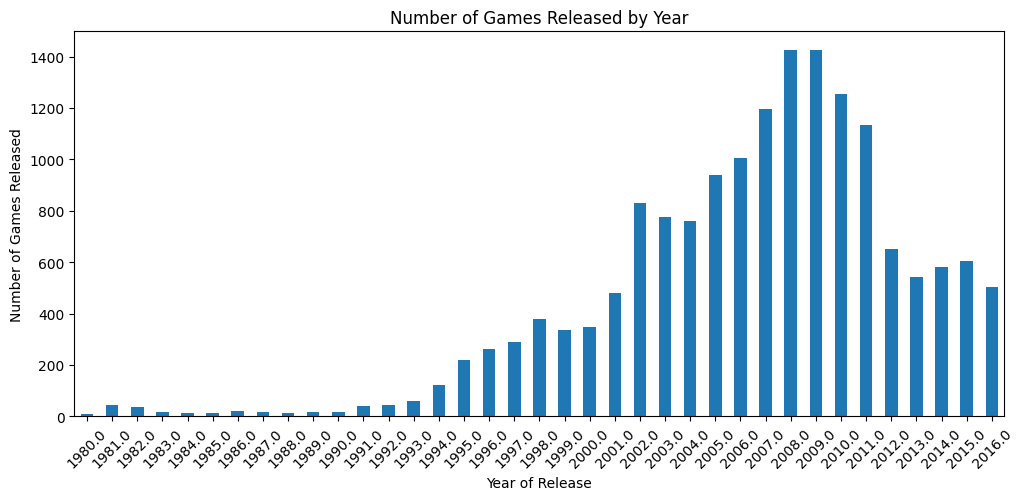

In [18]:
games_by_year.plot(kind='bar', x='year_of_release', y='count', title='Number of Games Released by Year', xlabel='Year of Release', ylabel='Number of Games Released', figsize=[12, 5], rot=45, legend=False)
plt.show()

In [19]:
games_by_year['count'].describe()

count      37.000000
mean      444.432432
std       451.567919
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: count, dtype: float64

This data set contains data 1980-2016.  Video game releases hit a high-point during this time--2007 with 1466 games--a significant increase over 1980 when only 9 games were released!  The market restabilized around 2012 when game releases dropped to a level more comparable to present: 652 games were released in 2012 while 502 were released last year (2016).  Due to this large degree of variation, means skew lower than they otherwise might for the entire dataset, but higher than they might if we include the video game boom of 2005-2011.  As a result, it would be best to focus our inquiry on games released since 2012 to incorporate only years where the number of releases is comparable to the number of releases in the present day.

In [20]:
since_2012 = games_by_year[games_by_year['year_of_release'] >= 2012]
since_2012

,year_of_release,count
32,2012.0,652
33,2013.0,544
34,2014.0,581
35,2015.0,606
36,2016.0,502


In [21]:
since_2012.describe()

,year_of_release,count
count,5.000000,5.000000
mean,2014.000000,577.000000
std,1.581139,57.436922
min,2012.000000,502.000000
25%,2013.000000,544.000000
50%,2014.000000,581.000000
75%,2015.000000,606.000000
max,2016.000000,652.000000


This is much more reflective of recent game release trends!  On average in recent years, 577 games were released each year.  Of course, Ice cannot afford to promote every game across every platform.  Therefore, portions of my analysis that require prediction will focus on the period since 2012.

###### Trends in Platform Popularity Over Time
Before narrowing in and to help ensure we are focusing on the correct interval, I will examine what trends over time have defined platform popularity.

In [22]:
pd.set_option('display.max_columns', None)
sales_by_platform = games.groupby(['year_of_release', 'platform']).agg(total_sbp=('global_sales', 'sum')).reset_index()
sbp_pivot = sales_by_platform.pivot(index='year_of_release', columns='platform', values='total_sbp')
tsal = sbp_pivot.sum().rename('Total')
tsal_df = pd.DataFrame(tsal).T
sbp_with_total = pd.concat([sbp_pivot, tsal_df])
sbp_with_total

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
1980.0,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984.0,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985.0,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,53.44,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986.0,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,NaN,45.01,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989.0,0.63,NaN,NaN,NaN,NaN,64.97,NaN,NaN,NaN,NaN,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is worth noting before proceeding that there may be some irregularities in this data given some of the outliers evident above, e.g. DS recording 20,000 in sales in 1985 despite not being released until 2004.  These cases are rare, however, and have minimal impact on the data or may have an explanation of which I am not aware such as an attempted revival of the platform, anniversary rerelease, etc.

In [23]:
platform_stats = sbp_pivot.describe()
platform_stats

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,N64,NES,NG,PC,PCFX,PS,PS2,PS3,PS4,PSP,PSV,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
count,10.000000,2.000000,6.000000,7.000000,11.000000,13.000000,8.000000,7.000000,5.00000,1.00,7.000000,12.000000,4.000000,26.000000,1.00,10.000000,12.000000,11.000000,4.000000,12.000000,6.000000,6.000000,2.000000,10.000000,1.00,3.000000,11.000000,5.000000,12.000000,9.000000,4.000000
mean,8.648000,0.050000,42.968333,2.278571,72.980000,19.571538,39.110000,28.104286,6.15400,0.04,31.144286,20.920833,0.360000,9.836923,0.03,72.758000,102.796667,84.667273,78.535000,24.127500,8.968333,5.598333,0.930000,20.004000,0.16,0.473333,81.016364,16.438000,80.103333,27.952222,39.830000
std,13.031075,0.042426,18.278261,2.543550,61.673155,18.465580,32.768255,18.845004,4.22616,NaN,21.875933,19.856724,0.308004,7.997666,NaN,63.351713,79.405729,54.637565,40.567917,20.190759,4.729695,3.967591,0.806102,15.479666,NaN,0.200333,79.136330,7.068244,57.484408,26.430731,20.313977
min,0.270000,0.020000,15.140000,0.020000,0.020000,1.430000,0.070000,0.270000,2.60000,0.04,0.080000,0.110000,0.100000,0.030000,0.03,2.070000,0.450000,3.600000,25.990000,0.120000,4.250000,0.090000,0.360000,0.220000,0.16,0.280000,0.180000,4.600000,1.520000,0.180000,18.960000
25%,0.640000,0.035000,31.775000,0.165000,14.140000,5.570000,4.810000,18.800000,3.07000,0.04,18.610000,5.485000,0.182500,4.442500,0.03,13.900000,35.977500,34.360000,58.435000,6.080000,5.035000,3.692500,0.645000,4.722500,0.16,0.370000,6.170000,16.350000,29.045000,0.990000,24.352500
50%,1.340000,0.050000,47.560000,1.070000,85.020000,12.180000,45.265000,27.620000,4.33000,0.04,34.100000,13.345000,0.270000,8.705000,0.03,65.330000,89.705000,107.360000,84.625000,26.185000,8.420000,5.295000,0.930000,21.185000,0.16,0.460000,59.650000,17.560000,91.995000,22.260000,40.110000
75%,9.995000,0.065000,55.267500,4.270000,124.975000,26.900000,64.687500,39.715000,8.13000,0.04,44.370000,38.560000,0.447500,12.410000,0.03,126.220000,170.900000,124.725000,104.725000,39.295000,11.572500,7.460000,1.215000,32.785000,0.16,0.570000,144.960000,21.650000,124.032500,49.080000,55.587500
max,35.680000,0.080000,63.200000,5.990000,146.940000,64.970000,77.910000,51.810000,12.64000,0.04,57.870000,53.440000,0.800000,35.030000,0.03,169.490000,211.810000,156.780000,118.900000,55.320000,16.190000,11.570000,1.500000,40.020000,0.16,0.680000,206.970000,22.030000,170.030000,65.420000,60.140000


In [24]:
count_stats = platform_stats.loc['count']
count_stats.describe()

count    31.000000
mean      7.677419
std       5.081910
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: count, dtype: float64

In [25]:
sales_stats = platform_stats.loc['max']
sales_stats.describe()

count     31.000000
mean      61.723871
std       65.026685
min        0.030000
25%        8.780000
50%       51.810000
75%       71.665000
max      211.810000
Name: max, dtype: float64

This data set is expansive, including data for 31 different platforms over 36 years.  However, the typical platform remains popular for 2-12 years with an average of a bit over 7.5 years (median of 7 years).  Unsurprisingly, PC platform gaming far exceeds this average with 26 years of game releases.  Other notable platforms historically are:
* 2600
* DS
* GB
* NES
* PS
* PS2
* PS3
* PSP
* Wii
* X360
  
However, in terms of greatest global sales, total sales have, in general, increased over time.  The median platform achieved 51 million in sales.  Any platform exceeding 71 million (75th percentile) is exceptional.  These platforms are:
* DS
* GBA
* PS
* PS2
* PS3
* PS4
* Wii
* X360
  
Of course, many of these platforms are no longer having new games released, but it is helpful to see what sort of platforms have historically been successful as this can help predict future popularity.

###### Trends in Platform Popularity since 2012
Considering the average platform remains relevant for an average of 7.5 years, I will maintain my focus on games released since 2012 when the market stabilized since this incorporates most of the average platform lifespan.  Furthermore, this interval incorporates all platforms for which games were still being released this year.  The only exceptions to this are the DS and PSP, which generated some sales during this time period, but no longer do as they have been superceded by their successors (3DS and PSV, respectively).  The platforms I will evaluate going forward are:
* 3DS
* PC
* PS3
* PS4
* PSV
* Wii
* WiiU
* X360
* XOne

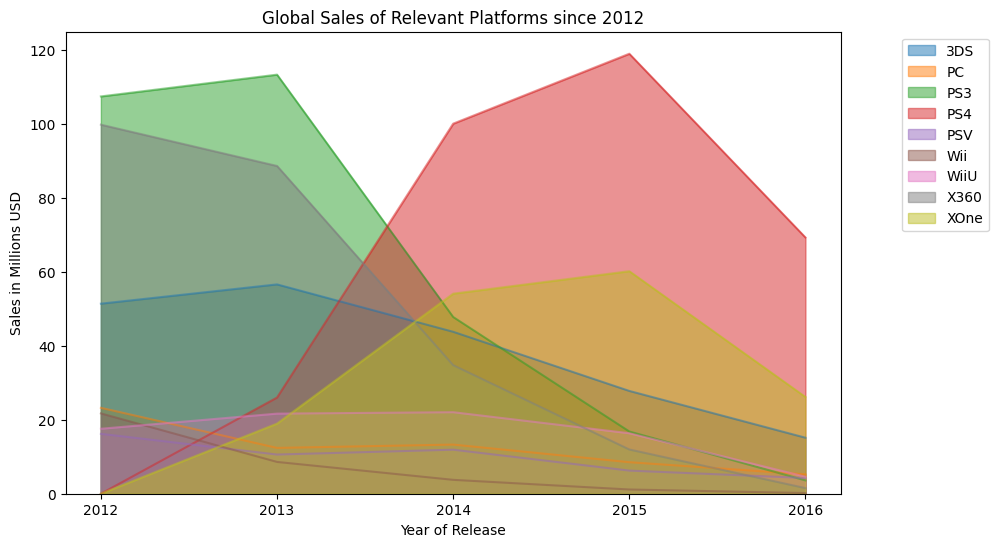

In [26]:
platforms_sales = games.groupby(['platform', 'year_of_release']).agg(global_sales = ('global_sales', 'sum')).reset_index()
platforms_to_include = ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
platforms_filtered = platforms_sales[(platforms_sales['platform'].isin(platforms_to_include)) & (platforms_sales['year_of_release'] >= 2012)]
platforms_filtered_pivot = platforms_filtered.pivot(index='year_of_release', columns='platform', values='global_sales').fillna(0)
platforms_filtered_pivot.plot.area(stacked=False, title='Global Sales of Relevant Platforms since 2012', xlabel='Year of Release', ylabel='Sales in Millions USD', figsize=[10, 6])
plt.legend(bbox_to_anchor=(1.2, 1))
plt.xticks(np.arange(2012,2017))
plt.show()

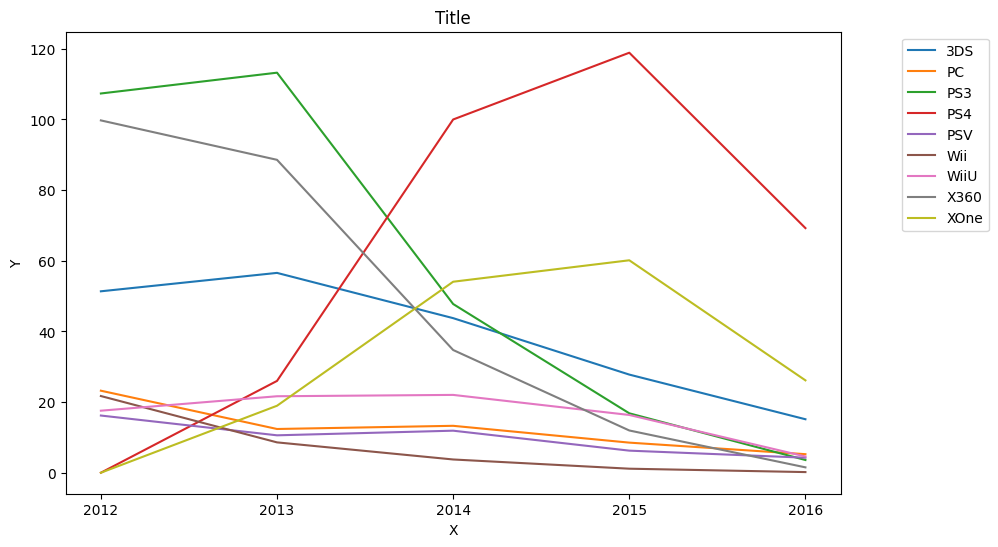

In [27]:
# Reviewer's code 4

import numpy as np

platforms_filtered_pivot.plot(figsize=(10,6))

plt.legend(bbox_to_anchor=(1.2, 1)) # move legend

plt.xticks(np.arange(2012,2017)) # change values

plt.title('Title')
plt.xlabel('X')
plt.ylabel('Y');

In [28]:
platforms_filtered.pivot(index='year_of_release', columns='platform', values='global_sales').fillna(0)

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2012.0,51.36,23.22,107.36,0.00,16.19,21.71,17.56,99.74,0.00
2013.0,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


The company should focus the majority of its advertising campaign for 2017 on PS4 games.  However, XBox One and 3DS are significant market competitors and games released on those platforms should be considered as having the potential to generate high sales, as well.  PC, PSV, Wii, WiiU, and X360 have all waned in popularity and are no longer strong competitors.

In [29]:
# Reviewer's code 3

games[games['year_of_release'] >= 2012].pivot_table(index='year_of_release', columns='platform', values='global_sales', aggfunc='sum')


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


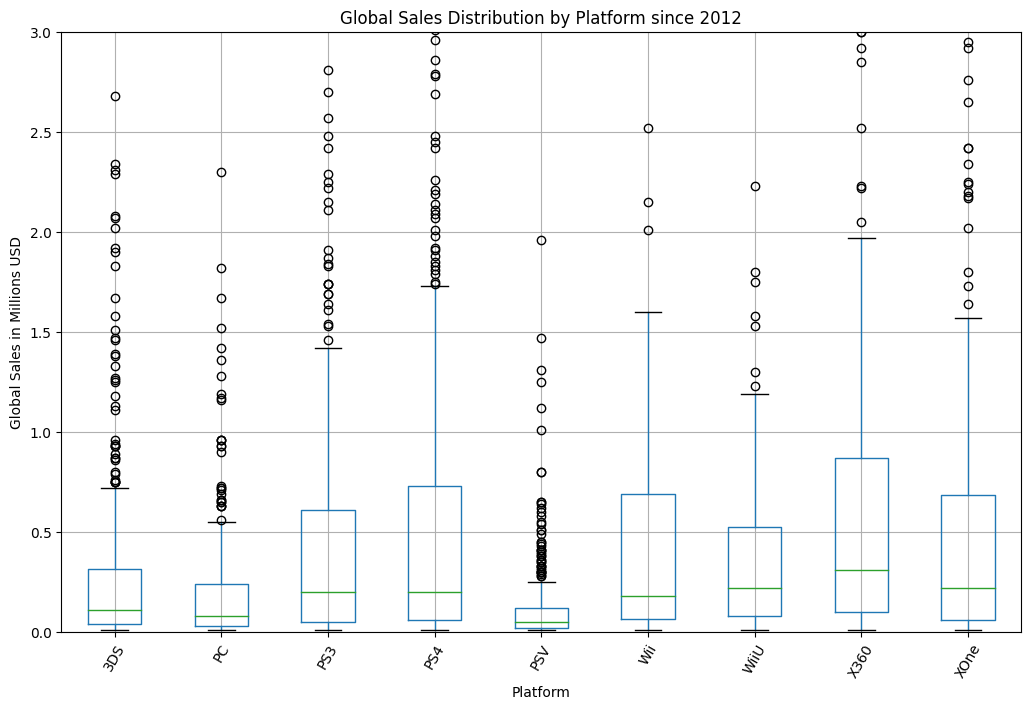

In [59]:
platforms_box = games[(games['platform'].isin(platforms_to_include)) & (games['year_of_release'] >= 2012)]
platforms_box.boxplot(column='global_sales', by='platform', figsize=[12, 8], rot=60)
plt.ylim(0, 3)
plt.title('Global Sales Distribution by Platform since 2012')
plt.suptitle('')
plt.xlabel('Platform')
plt.ylabel('Global Sales in Millions USD');

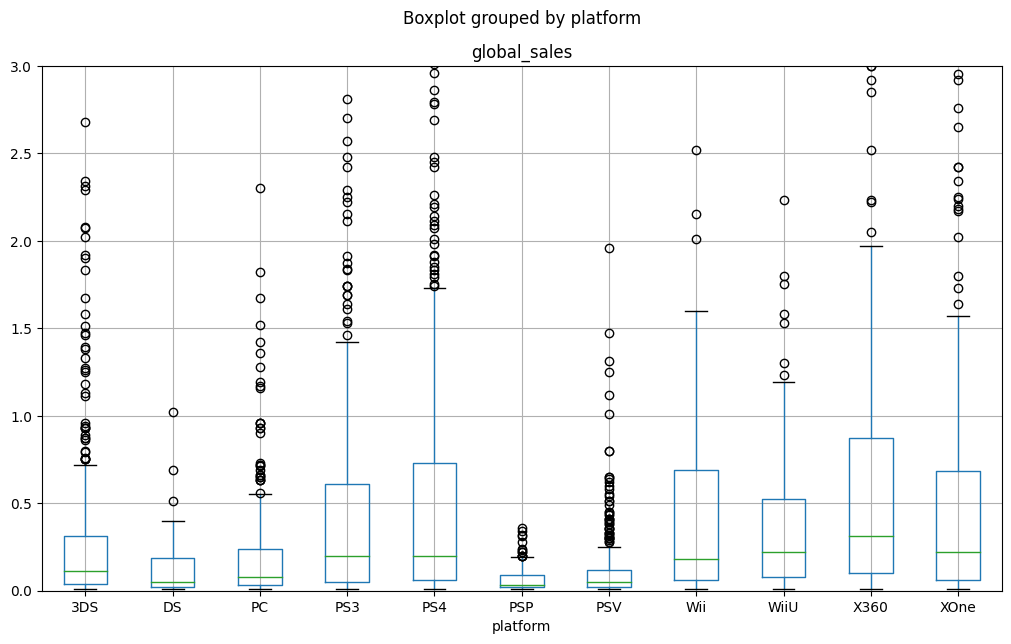

In [31]:
# Reviewer's code 4

# import warnings
# warnings.filterwarnings('ignore')

games[games['year_of_release'] >= 2012].boxplot('global_sales', by='platform', figsize=(12,7))
plt.ylim(0,3);

Overall, PS4 is definitely the most popular platform currently with the highest median sales.  PS3 has  been very successful within recent years, but as we can see in the previous plot, it has waned in popularity since PS4 was released.  Still, this only bolsters confidence that PS4's popularity is not merely a fad.
3DS's median annual sales are much lower than PS4 (approximately 45 million vs 85 million).  Likewise, XBox One is comparable in terms of its median annual sales (40 million).  Ice should promote games for these platforms as they do have considerable market share, especially if a game is not being released for PS4; however, PS4 promotion should take half the overall budget with these platforms claiming the remainder.

###### Impact of Reviews on Sales by Platform
I will now examine the impact that user and professional reviews have on the sales of games for the PS4, 3DS, and XBox One so that the marketing team can decide whether or not to pay attention to reviews when selecting promising games.

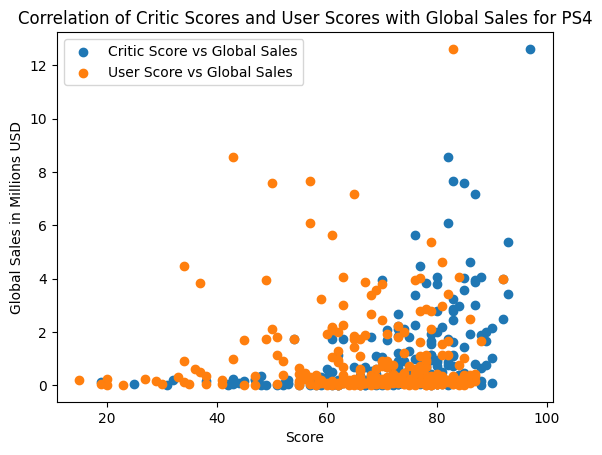

In [32]:
ps4_reviews_sales = games[games['platform'] == 'PS4']
plt.scatter(ps4_reviews_sales['critic_score'], ps4_reviews_sales['global_sales'], label='Critic Score vs Global Sales')
plt.scatter((ps4_reviews_sales['user_score']*10), ps4_reviews_sales['global_sales'], label='User Score vs Global Sales')
plt.title('Correlation of Critic Scores and User Scores with Global Sales for PS4')
plt.xlabel('Score')
plt.ylabel('Global Sales in Millions USD')
plt.legend(loc='upper left')
plt.show()

In [33]:
#dropping null values so I can run the code below
ps4_reviews_sales = ps4_reviews_sales.dropna(subset=['critic_score', 'user_score', 'global_sales'])

In [34]:
stats.pearsonr(ps4_reviews_sales['critic_score'], ps4_reviews_sales['global_sales'])

PearsonRResult(statistic=0.4058948014583664, pvalue=2.7077033851167698e-11)

In [35]:
stats.pearsonr(ps4_reviews_sales['user_score'], ps4_reviews_sales['global_sales'])

PearsonRResult(statistic=-0.033624975965288795, pvalue=0.5974488511473612)

Critic and User scores have minimal effect on sales for PS4 games.  Critic scores demonstrate a moderate correlation with sales and deserve some attention when determining which games to promote, but user scores have a weak negative correlation and should be ignored.  Is this true only for PS4 or was this true for our other promising platforms: 3DS and XBox One?

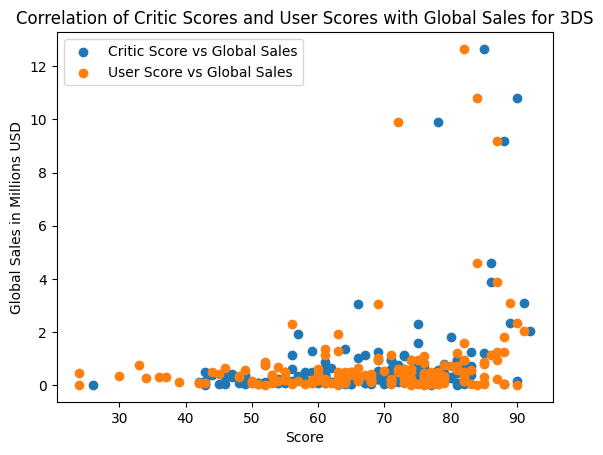

In [36]:
ds3_reviews_sales = games[games['platform'] == '3DS']
plt.scatter(ds3_reviews_sales['critic_score'], ds3_reviews_sales['global_sales'], label='Critic Score vs Global Sales')
plt.scatter((ds3_reviews_sales['user_score']*10), ds3_reviews_sales['global_sales'], label='User Score vs Global Sales')
plt.title('Correlation of Critic Scores and User Scores with Global Sales for 3DS')
plt.xlabel('Score')
plt.ylabel('Global Sales in Millions USD')
plt.legend(loc='upper left')
plt.show()

In [37]:
#dropping null values so I can run the code below
ds3_reviews_sales = ds3_reviews_sales.dropna(subset=['critic_score', 'user_score', 'global_sales'])

In [38]:
stats.pearsonr(ds3_reviews_sales['critic_score'], ds3_reviews_sales['global_sales'])

PearsonRResult(statistic=0.33982433444535515, pvalue=1.2520352635511836e-05)

In [39]:
stats.pearsonr(ds3_reviews_sales['user_score'], ds3_reviews_sales['global_sales'])

PearsonRResult(statistic=0.23340274380792844, pvalue=0.0031632979329398615)

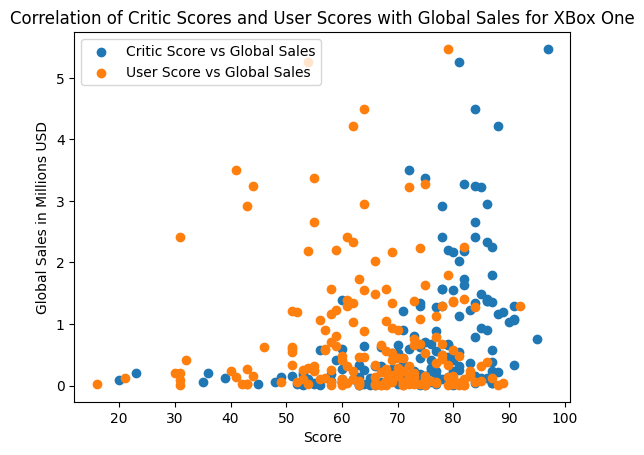

In [40]:
xone_reviews_sales = games[games['platform'] == 'XOne']
plt.scatter(xone_reviews_sales['critic_score'], xone_reviews_sales['global_sales'], label='Critic Score vs Global Sales')
plt.scatter((xone_reviews_sales['user_score']*10), xone_reviews_sales['global_sales'], label='User Score vs Global Sales')
plt.title('Correlation of Critic Scores and User Scores with Global Sales for XBox One')
plt.xlabel('Score')
plt.ylabel('Global Sales in Millions USD')
plt.legend(loc='upper left')
plt.show()

In [41]:
#dropping null values so I can run the code below
xone_reviews_sales = xone_reviews_sales.dropna(subset=['critic_score', 'user_score', 'global_sales'])

In [42]:
stats.pearsonr(xone_reviews_sales['critic_score'], xone_reviews_sales['global_sales'])

PearsonRResult(statistic=0.410422035612964, pvalue=4.3738158698173036e-08)

In [43]:
stats.pearsonr(xone_reviews_sales['user_score'], xone_reviews_sales['global_sales'])

PearsonRResult(statistic=-0.09400318326920858, pvalue=0.22976114469547793)

For the 3DS, both user_score and critic_score have a weak correlation with sales and deserve only minimal attention when determining which games to promote.

XBox One is similar to PS4: critic_score has a moderate positive correlation and deserves some attention, but user_score has a very weak negative correlation and should be ignored.

###### Historical Impact of Genre on Sales
I will now analyze which genres perform best to determine the most effective use of the marketing budget.

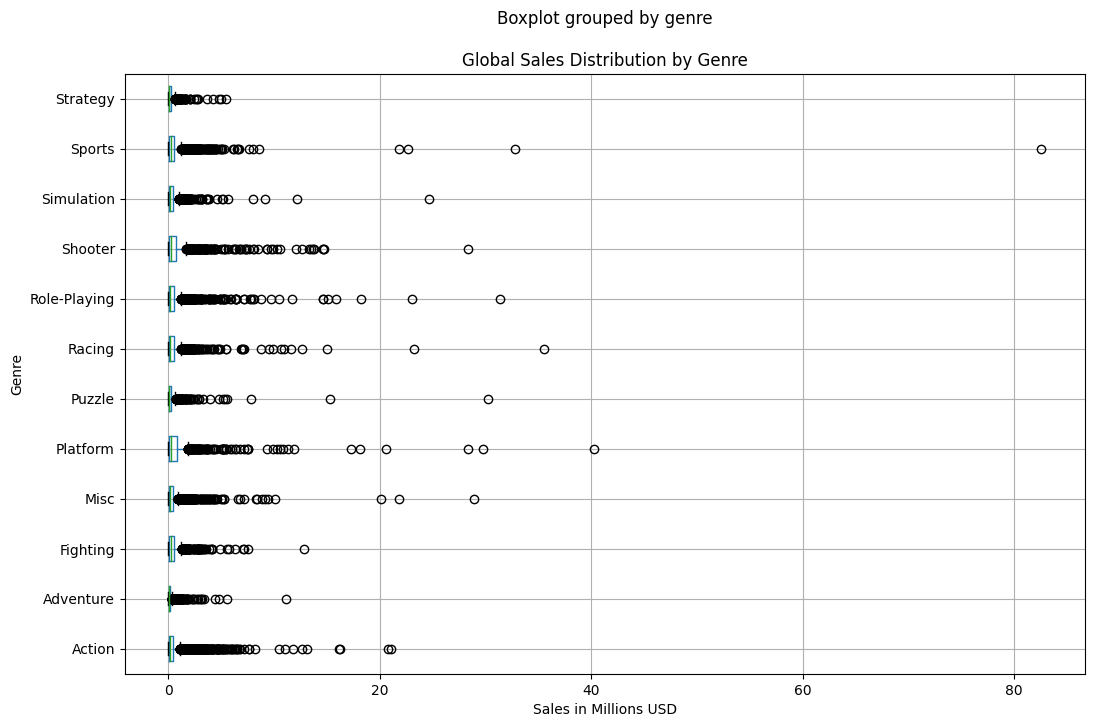

In [44]:
games.boxplot(column='global_sales', by='genre', figsize=[12, 8], vert=False)
plt.title('Global Sales Distribution by Genre')
plt.xlabel('Sales in Millions USD')
plt.ylabel('Genre')
plt.show()

In [45]:
games_by_genre = games.groupby('genre').agg(median_by_genre = ('global_sales', 'median'), mean_by_genre = ('global_sales', 'mean')).reset_index()
games_by_genre

,genre,median_by_genre,mean_by_genre
0,Action,0.19,0.517711
1,Adventure,0.05,0.182341
2,Fighting,0.21,0.527126
3,Misc,0.16,0.458577
4,Platform,0.27,0.932173
5,Puzzle,0.11,0.418224
6,Racing,0.19,0.583403
7,Role-Playing,0.18,0.623872
8,Shooter,0.24,0.795503
9,Simulation,0.15,0.446701


Overall, the video game market has fairly lacklustre sales performance, regardless of genre.  The genres that perform slightly higher than others consistently (based on median sales) are Fighting, Platform, Shooter, and Sports games.  However, as is evident in the boxplot, there are a handful of runaway successes that are worth paying attention to.  Calculating the mean helps us to understand the weight of those outliers and which genres are more likely to generate another runaway success.  Platform games sell especially well, approaching a mean of 1 million USD, and the second-highest selling game of all time is in this category.  The Shooter and Role-Playing genres are also likely to produce a best seller.  Nonetheless, the highest grossing game of all time was a Sports game and a few other outliers exceeding 20 million USD suggest this genre is one to keep an eye on.
  
A different way to consider this problem is determining which genres the company <i>should not</i> promote.  Adventure and Strategy games typically do not sell well and have yet to produce an uncommonly successful game.  Fighting games, though decently consistent in producing slightly higher median sales that other genres, are not likely to be a runaway success, having historically not produced such a game, and therefore are more likely to protect the bottom line than generate record sales for Ice.

# Regional Profiles
Video games are marketed and sales are tracked according to three main regions: North America, Europe, and Japan.  In this section, I will analyze how regional differences affect sales by identifying the most popular platforms, most popular genres, and effect of ESRB ratings.  As above, I will focus only on the period 2012-present and the platforms for which games are still being released.

###### Regional Platform Preferences, 2012-present

In [46]:
platforms_2012to2016 = games.groupby(['platform', 'year_of_release']).agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
platforms_2012to2016_filtered = platforms_2012to2016[(platforms_2012to2016['platform'].isin(platforms_to_include)) & (platforms_2012to2016['year_of_release'] >= 2012)].reset_index(drop=True)
platforms_2012to2016_filtered

,platform,year_of_release,na_sales,eu_sales,jp_sales
0,3DS,2012.0,17.11,11.68,19.98
1,3DS,2013.0,15.56,14.84,23.57
2,3DS,2014.0,12.33,8.73,20.69
3,3DS,2015.0,6.17,5.06,15.52
4,3DS,2016.0,4.14,2.33,8.03
5,PC,2012.0,8.01,12.40,0.00
6,PC,2013.0,3.88,7.39,0.00
7,PC,2014.0,3.51,8.87,0.00
8,PC,2015.0,2.36,5.57,0.00
9,PC,2016.0,1.36,3.53,0.00


In [47]:
sales_by_region = platforms_2012to2016_filtered.groupby('platform').agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
sales_by_region
regs = ['na_sales', 'eu_sales', 'jp_sales']
def top_5 (df, regs, top_n=5):
    top_platforms = {}
    for reg in regs:
        top_platforms[reg] = df.nlargest(top_n, reg).reset_index(drop=True)
    return top_platforms
top_platforms = top_5(sales_by_region, regs, 5)
for reg, top_5 in top_platforms.items():
    print(f'Top platforms for {reg}:')
    print(top_5['platform'].tolist())

Top platforms for na_sales:
['X360', 'PS4', 'PS3', 'XOne', '3DS']
Top platforms for eu_sales:
['PS4', 'PS3', 'X360', 'XOne', '3DS']
Top platforms for jp_sales:
['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']


There is a great deal of overlap in platform popularity (as determined by sales), but each region has their own preferred platforms.  Playstations 3 & 4 and 3DS are popular in every market.  XBox 360 and XBox One are popular in North America and Europe, but their popularity does not extend to Japan.  However, Japan has an affinity for PSV and WiiU that does not extend to the North American and European markets.  In general, Japan is a unique market space compared with North America and Europe, which have a significant level of overlap, perhaps due to linguistic commonality.

###### Regional Genre Preferences, 2012-present

In [48]:
genres_2012to2016 = games.groupby(['genre', 'year_of_release']).agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
genres_2012to2016_filtered = genres_2012to2016[genres_2012to2016['year_of_release'] >= 2012].reset_index(drop=True)
genres_2012to2016_filtered

,genre,year_of_release,na_sales,eu_sales,jp_sales
0,Action,2012.0,51.79,41.21,12.31
1,Action,2013.0,53.52,43.45,10.91
2,Action,2014.0,38.85,39.86,6.53
3,Action,2015.0,24.39,24.14,15.98
4,Action,2016.0,9.29,10.68,7.07
5,Adventure,2012.0,1.78,1.21,2.42
6,Adventure,2013.0,1.50,1.76,2.22
7,Adventure,2014.0,1.80,1.82,1.38
8,Adventure,2015.0,2.89,3.35,1.04
9,Adventure,2016.0,0.95,1.32,1.18


In [49]:
sbr_genre = genres_2012to2016_filtered.groupby('genre').agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
def top_5_gen (df, regs, top_n=5):
    top_genres = {}
    for reg in regs:
        top_genres[reg] = df.nlargest(top_n, reg).reset_index(drop=True)
    return top_genres
top_genres = top_5_gen(sbr_genre, regs, 5)
for reg, top_5_gen in top_genres.items():
    print(f'Top platforms for {reg}:')
    print(top_5_gen['genre'].tolist())

Top platforms for na_sales:
['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
Top platforms for eu_sales:
['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']
Top platforms for jp_sales:
['Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting']


As with platform, there is a great deal of overlap in preferred genres, as determined by sales data.  Action and Role-Playing games are popular in all markets.  Shooter and Sports games are popular in North America and Europe, though not in Japan.  Simulation and Fighting games are only popular in Japan, while Racing games are only popular in Europe.  If looking for a hit across all markets, Action or Role-Playing games are the way to go.

###### Regional Rating Preferences, 2012-present  
I will now analyze the impact of ESRB ratings on 2012-2016 sales.

In [50]:
ratings_2012to2016_filtered = games[(games['rating'] != 'Unknown') & (games['year_of_release'] >= 2012)].reset_index(drop=True)
ratings_2012to2016 = ratings_2012to2016_filtered.groupby(['rating']).agg(na_sales = ('na_sales', 'sum'), eu_sales = ('eu_sales', 'sum'), jp_sales = ('jp_sales', 'sum')).reset_index()
ratings_2012to2016

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.03,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02


In [51]:
def top_esrb(df, regs, top_n=4):
    top_esrb = {}
    for reg in regs:
        top_esrb[reg] = df.nlargest(top_n, reg).reset_index(drop=True)
    return top_esrb
top_esrb = top_esrb(ratings_2012to2016, regs, 4)
for reg, top_esrb in top_esrb.items():
    print(f'Top ratings for {reg}:')
    print(top_esrb['rating'].tolist())

Top ratings for na_sales:
['M', 'E', 'E10+', 'T']
Top ratings for eu_sales:
['M', 'E', 'E10+', 'T']
Top ratings for jp_sales:
['E', 'T', 'M', 'E10+']


Overall, a game rated anywhere between E and M can be successful if released globally, so rating is a minor factor to consider in selecting a promising new game.  North America and Europe have the strongest preference for M-rated games, while Japan most favors E-rated games.  North America and Europe have identical preferences, perhaps due to linguistic commonality, while Japan is unique.

# Testing Hypotheses
Per the marketing team's requests, I will conclude this analysis by checking whether average user scores are the same for XBox One and PC games and whether they are different for Action and Sports games.
  
I will begin first by checking average user scores of XBox One vs PC games using a typical alpha threshold of 0.05 to ensure any difference identified is statistically significant and worth rejecting the null hypothesis.
  
  Null Hypothesis: The average user scores of XBox One and PC games are equal.
  
  Alternative Hypothesis: The average user scores of XBox One and PC games are not equal.

In [61]:
games_2012to2016 = games[games['year_of_release'] >= 2012].reset_index(drop=True)
games_2012to2016['user_score'] = pd.to_numeric(games_2012to2016_filtered['user_score'], errors='coerce')
xone = games_2012to2016[games_2012to2016['platform'] == 'XOne'].dropna(subset=['user_score'])
pc = games_2012to2016[games_2012to2016['platform'] == 'PC'].dropna(subset=['user_score'])
xone_scores = xone['user_score'].values
pc_scores = pc['user_score'].values
if np.array_equal(xone_scores, pc_scores) or len(xone_scores) < 2 or len(pc_scores) < 2:
    print("Data for the two platforms are nearly identical or insufficient for t-test.")
else:
    alpha = 0.05
    results = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)
    print('p-value:', results.pvalue)
    if results.pvalue < alpha:
        print('We reject the null hypothesis.')
    else:
        print('We cannot reject the null hypothesis.')
xone_mean = xone_scores.mean()
pc_mean = pc_scores.mean()
print(f'XBox One\'s mean user score is {xone_mean:.2f}.  PC\'s mean user score is {pc_mean:.2f}.')

p-value: 0.5489537965134912
We cannot reject the null hypothesis.
XBox One's mean user score is 6.52.  PC's mean user score is 6.43.


We cannot reject the null hypothesis.  The mean user scores are fairly similar with a difference of less than 0.1... users seem to enjoy games on each platform about the same!
  
Now, I will see if user rating for the Action and Sports genres are different, again using a typical 0.05 alpha value.
  
The Null Hypothesis: The average user scores of the  Action and Sports genres are equal.
  
The Alternative Hypothesis: The average user scores of the Action and Sports genres are not equal.

In [54]:
action = games[(games['genre'] == 'Action') & (games['year_of_release'] >= 2012)].dropna(subset=['user_score'])
sports = games[(games['genre'] == 'Sports') & (games['year_of_release'] >= 2012)].dropna(subset=['user_score'])
action_scores = action['user_score'].values
sports_scores = sports['user_score'].values
alpha = 0.05
results = stats.ttest_ind(action_scores, sports_scores, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')
action_mean = action_scores.mean()
sports_mean = sports_scores.mean()
print(f'Action games receive a mean user score of {action_mean: .2f}.  Sports games receive a mean user score of {sports_mean: .2f}.')

p-value: 8.449849446620471e-20
We reject the null hypothesis.
Action games receive a mean user score of  6.83.  Sports games receive a mean user score of  5.46.


We reject the null hypothesis; the average user scores of the Action and Sports genres are quite different.  Action games receive an average user score of 6.83, while Sports games score much lower at 5.46.

# Conclusion
This analysis has interpreted data on 16k video games released between 1980-2016 to help Ice plan its advertising campaigns for 2017.  For many portions of the analysis, I focused only on games released 2012-2016 for the most accurate and current conditions to inform my analysis.
  
To maximize profits, I recommend that the marketing team focus efforts on promoting games for the PlayStation 4 as it is currently the most popular platform and PlayStation has historically had global popularity.  3DS is also popular, though its sales are around half that of PS4.  XBox One performs well in the North American and European markets, though it, too, grosses only half as much as PS4.  The team should also stay alert for information about upcoming handheld and console releases as these have historically generated significant revenue.  PC games are not nearly as profitable, despite the longevity of this platform.
  
Critic scores show a moderate correlation with sales for PS4 and XBox One and should receive some consideration when selecting which games to market.  For 3DS, critic scores have a weak correlation and deserve minimal attention.  User scores have a weak positive correlation for the 3DS, but for the PS4 and XBox One they have a weak negative correlation.  In any case, user scores can be disregarded.  Initial game releases are more profitable than rereleases.

Looking at the entire data set, genre has minimal impact on sales, though Fighting, Platform, Shooter, and Sports games have slightly higher median sales.  Action, and Role-Playing games have a significant marketshare in all regions and are a safe bet.  Adventure and Strategy games historically underperform.

Any rating has potential to be successful.  North America and Europe have the strongest preference for M-rated games, while Japan most favors E-rated games.

Overall, I recommend that the marketing team prioritize PlayStation 4 games and market only 3DS and XBox One games that are not being released for PS4. Action and Role-Playing games are the best bets for high sales as they are popular globally.  The ideal release for global success in 2017 would be a newly-released PlayStation 4 Action or Role-Playing game.